In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import Counter 

In [269]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')

In [270]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [271]:
df.shape

(5572, 5)

# **1. Data Cleaning**

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [273]:
# drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [274]:
df.sample(5)

,v1,v2
1881,ham,Ok.. ÌÏ finishing soon?
762,spam,Urgent Ur å£500 guaranteed award is still uncl...
5447,ham,So that takes away some money worries
2524,spam,FREE entry into our å£250 weekly comp just sen...
723,ham,Ya even those cookies have jelly on them


In [275]:
# rename columns
df.rename(columns = {'v1': 'label', 'v2': 'text'}, inplace=True)
df.sample(5)

,label,text
173,ham,"Bloody hell, cant believe you forgot my surnam..."
3476,ham,I got it before the new year cos yetunde said ...
3860,spam,Free Msg: Ringtone!From: http://tms. widelive....
218,ham,I have to take exam with march 3
2019,ham,From tomorrow onwards eve 6 to 3 work.


In [276]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [277]:
df['label'] = encoder.fit_transform(df['label'])
df.sample(5)

,label,text
4891,0,Miserable. They don't tell u that the side eff...
4873,0,Wat happened to the cruise thing
4005,0,IM FINE BABES AINT BEEN UP 2 MUCH THO! SAW SCA...
592,1,PRIVATE! Your 2003 Account Statement for 07753...
3326,0,what number do u live at? Is it 11?


In [278]:
# check missing value
df.isnull().sum()

label    0
text     0
dtype: int64

In [279]:
# check duplicate values
df.duplicated().sum()

np.int64(403)

In [280]:
# remove duplicate values
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [281]:
df.shape

(5169, 2)

# **2. EDA**

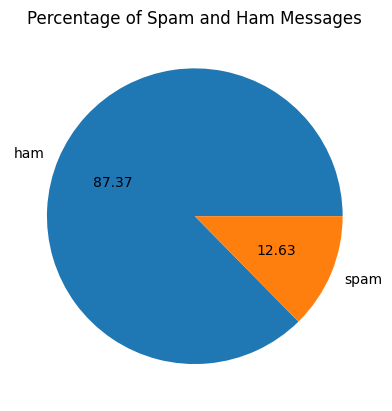

In [282]:
# check percentage of spam and ham
df['label'].value_counts()
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.title('Percentage of Spam and Ham Messages')
plt.show()

In [283]:
import nltk

In [284]:
# download punkt tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\redow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\redow\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [285]:
# count number of characters in each text
df['num_char'] = df['text'].apply(len)

In [286]:
df.sample(5)

,label,text,num_char
4267,0,Hey so whats the plan this sat?,32
5544,0,"I'm taking derek &amp; taylor to walmart, if I...",154
3302,0,"It'll be tough, but I'll do what I have to",42
872,0,I'll text you when I drop x off,31
3795,0,They have a thread on the wishlist section of ...,144


In [287]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [289]:
df.head()

,label,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [290]:
# count number of sentences in each text
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [291]:
df.head()

,label,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [292]:
df[['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [293]:
# for ham description
df[df['label'] == 0][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [294]:
# for spam description
df[df['label'] == 1][['num_char', 'num_words', 'num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


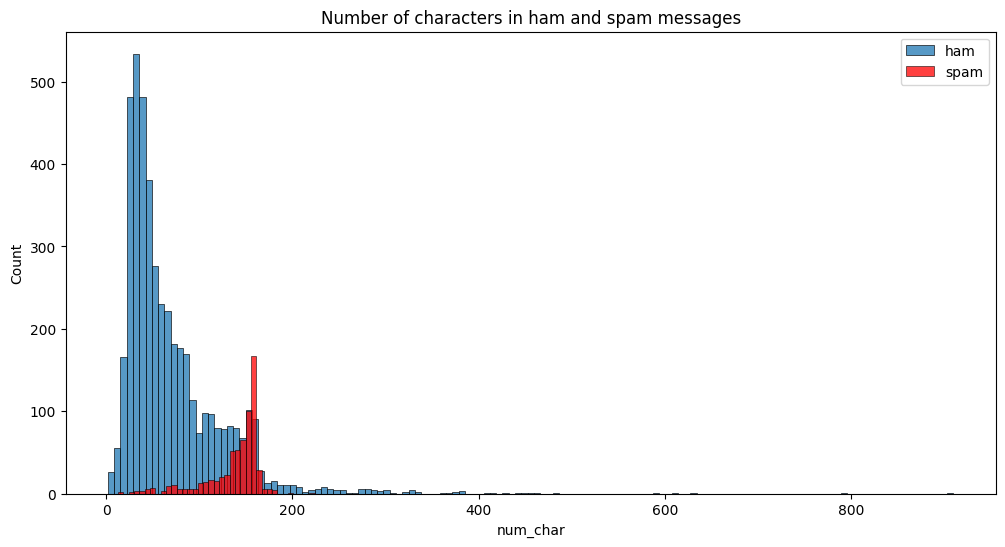

In [295]:
# visualize number of characters in ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_char'])
sns.histplot(df[df['label'] == 1]['num_char'], color = 'red')
plt.legend(['ham', 'spam'])
plt.title('Number of characters in ham and spam messages')
plt.show()

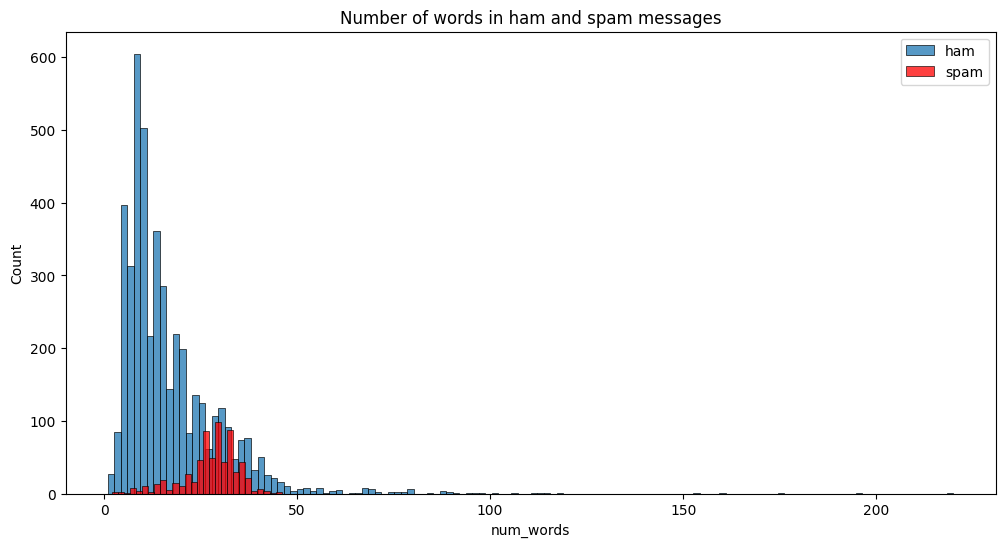

In [296]:
# visualize number of words in ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'], color = 'red')
plt.legend(['ham', 'spam'])
plt.title('Number of words in ham and spam messages')
plt.show()

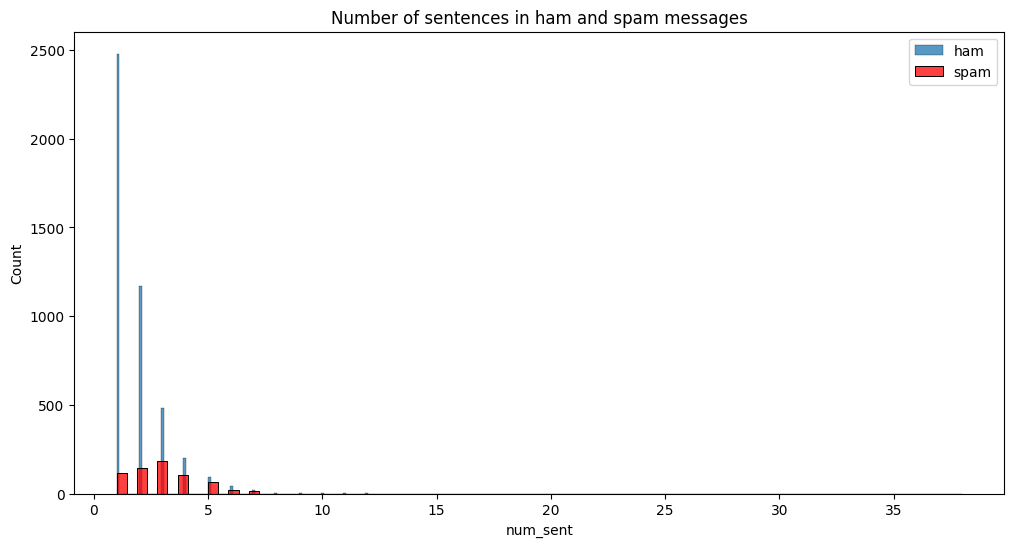

In [297]:
# visualize number of sentences in ham and spam messages
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['num_sent'])
sns.histplot(df[df['label'] == 1]['num_sent'], color = 'red')
plt.legend(['ham', 'spam'])
plt.title('Number of sentences in ham and spam messages')
plt.show()

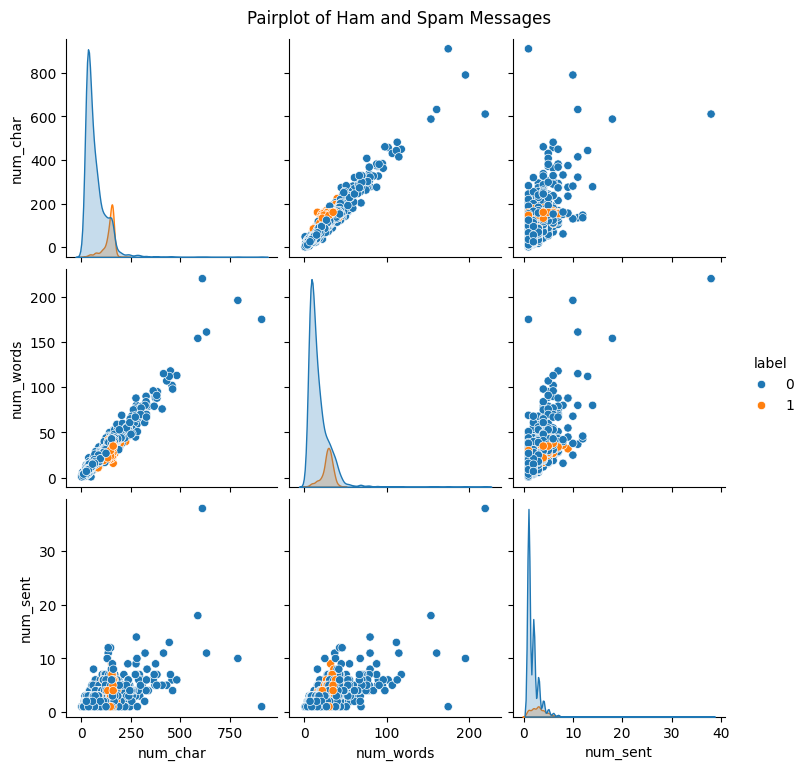

In [298]:
# visualize the relationship between number of characters, words, and sentences
sns.pairplot(df, hue='label')
plt.suptitle('Pairplot of Ham and Spam Messages', y=1.02)
plt.show()

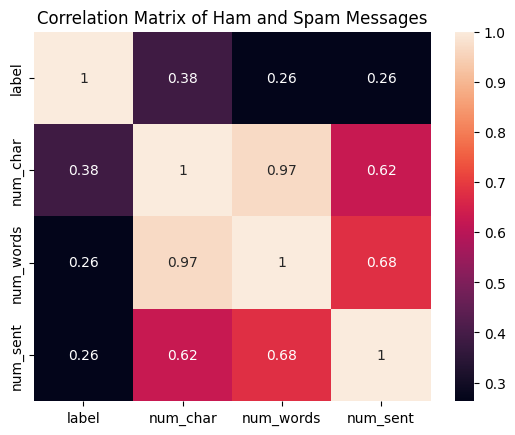

In [299]:
# Compute correlation matrix excluding the 'text' column
df_corr = df.drop(columns=['text']).corr()
sns.heatmap(df_corr, annot= True)
plt.title('Correlation Matrix of Ham and Spam Messages')
plt.show()

## **Findings:😁**

1. **Correlation Analysis:**
    - The `label` column has a moderate positive correlation with `num_char` (0.3847), indicating that spam messages tend to have more characters.
    - The `num_char` and `num_words` columns are highly correlated (0.9658), suggesting that longer messages generally contain more words.
    - The `num_sent` column has a moderate correlation with both `num_char` (0.6241) and `num_words` (0.6800), indicating that messages with more sentences also tend to have more characters and words.

2. **Imbalance in Data:**
    - The dataset is imbalanced, with significantly more ham messages than spam messages.

3. **Text Characteristics:**
    - Spam messages generally have more characters, words, and sentences compared to ham messages, as observed in the descriptive statistics and visualizations.

# **3. Data preprocessing**
- lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [300]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\redow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [302]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum(): # check if the word is alphanumeric
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [303]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [304]:
df['transformed_text'] = df['text'].apply(transform_text)

In [305]:
df.head()

,label,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [306]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [307]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [308]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=' '))

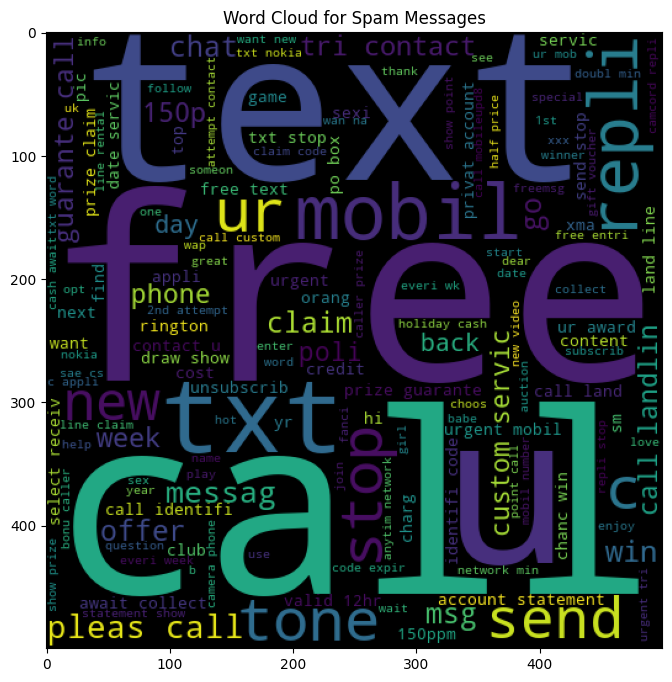

In [309]:
plt.figure(figsize=(16, 8))
plt.title('Word Cloud for Spam Messages')
plt.imshow(spam_wc)
plt.show()

In [310]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=' '))

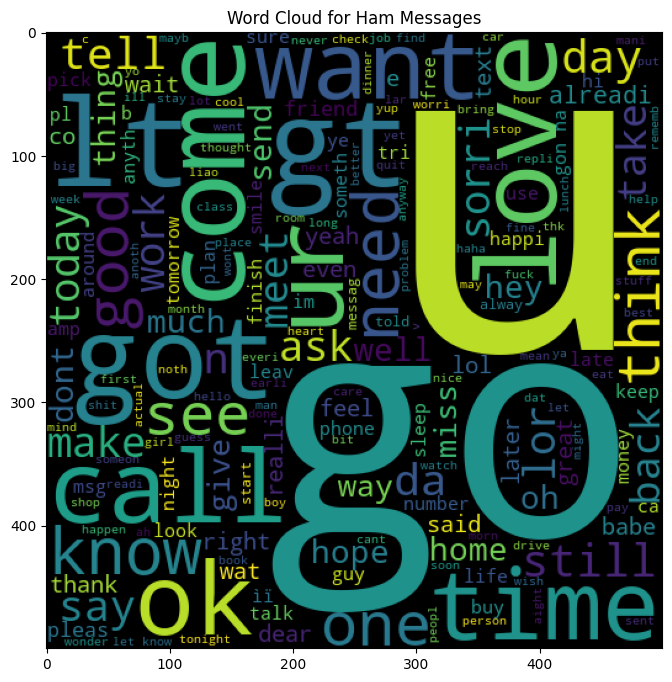

In [311]:
plt.figure(figsize=(16, 8))
plt.title('Word Cloud for Ham Messages')
plt.imshow(ham_wc)
plt.show()

In [312]:
df.head()

,label,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [313]:
spam_corpus = []
for msg in  df[df['label'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [314]:
len(spam_corpus)

9939

C:\Users\redow\AppData\Local\Temp\ipykernel_7444\3866275048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],


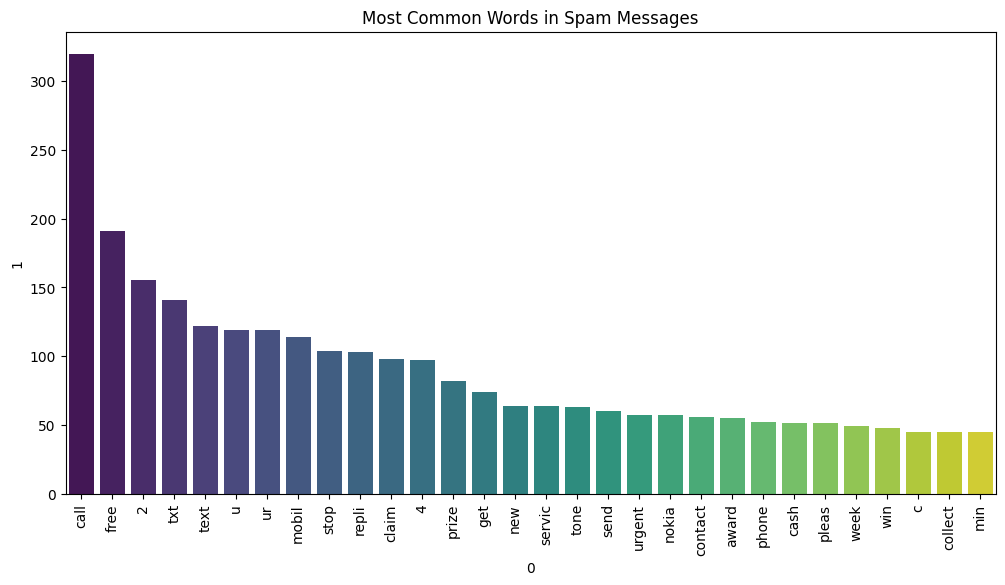

In [315]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Spam Messages')
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
            palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Spam Messages')
plt.show()


In [316]:
ham_corpus = []
for msg in  df[df['label'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [317]:
len(ham_corpus)

35404

C:\Users\redow\AppData\Local\Temp\ipykernel_7444\3302483231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],


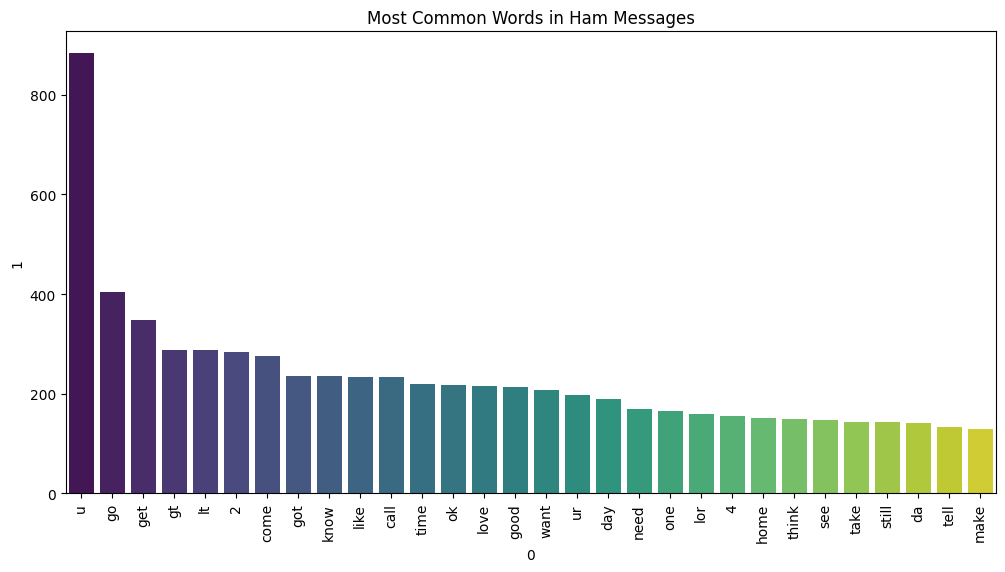

In [318]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Spam Messages')
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
            palette='viridis')
plt.xticks(rotation='vertical')
plt.title('Most Common Words in Ham Messages')
plt.show()


# **4. Model Building**
- Text vectorization using `Bag of words`

In [422]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [423]:
X = tfidf.fit_transform(df['transformed_text']).toarray() 
# X = cv.fit_transform(df['transformed_text']).toarray() 

In [424]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [427]:
X.shape

(5169, 3000)

In [428]:
y = df['label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [429]:
from sklearn.model_selection import train_test_split

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [431]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [432]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [433]:
# for Gaussian Naive Bayes
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(f"1.Accuracy: {accuracy_score(y_test, y_pred_gnb):.2f}")
print(f"2.Confusion Matrix:\n{confusion_matrix(y_test, y_pred_gnb)}")
print(f"3.Precision: {precision_score(y_test, y_pred_gnb):.2f}")


1.Accuracy: 0.87
2.Confusion Matrix:
[[790 106]
 [ 24 114]]
3.Precision: 0.52


In [434]:
# for Multinomial Naive Bayes
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print(f"1.Accuracy: {accuracy_score(y_test, y_pred_mnb):.2f}")
print(f"2.Confusion Matrix:\n{confusion_matrix(y_test, y_pred_mnb)}")
print(f"3.Precision: {precision_score(y_test, y_pred_mnb):.2f}")

1.Accuracy: 0.97
2.Confusion Matrix:
[[896   0]
 [ 30 108]]
3.Precision: 1.00


In [435]:
# for Bernoulli Naive Bayes
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print(f"1.Accuracy: {accuracy_score(y_test, y_pred_bnb):.2f}")
print(f"2.Confusion Matrix:\n{confusion_matrix(y_test, y_pred_bnb)}")
print(f"3.Precision: {precision_score(y_test, y_pred_bnb):.2f}")

1.Accuracy: 0.98
2.Confusion Matrix:
[[895   1]
 [ 16 122]]
3.Precision: 0.99


## **Finding: As `Precision Score`😁**
### **1. For `CountVectorizer`**
- **`gnb`: 0.53**
- **`mnb`: 0.83**
- **`bnb`: 0.97**
### **1. For `TfidfVectorizer`**
- **`gnb`: 0.52**
- **`mnb`: 1.00**
- **`bnb`: 0.97**
#### ***So, we choose TfidfVectorizer and Multinomial Naive Bayes***

In [436]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [437]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [438]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [439]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [440]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ", name)
    print("1.Accuracy: ",current_accuracy)
    print("2.Precision: ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
1.Accuracy:  0.9758220502901354
2.Precision:  0.9747899159663865
For  KN
1.Accuracy:  0.9052224371373307
2.Precision:  1.0
For  NB
1.Accuracy:  0.9709864603481625
2.Precision:  1.0
For  DT
1.Accuracy:  0.9323017408123792
2.Precision:  0.8333333333333334
For  LR
1.Accuracy:  0.9555125725338491
2.Precision:  0.96
For  RF
1.Accuracy:  0.9738878143133463
2.Precision:  0.9826086956521739
For  AdaBoost
1.Accuracy:  0.9216634429400387
2.Precision:  0.8202247191011236
For  BgC
1.Accuracy:  0.9584139264990329
2.Precision:  0.8682170542635659
For  ETC
1.Accuracy:  0.9748549323017408
2.Precision:  0.9745762711864406
For  GBDT
1.Accuracy:  0.9506769825918762
2.Precision:  0.9306930693069307
For  xgb
1.Accuracy:  0.9680851063829787
2.Precision:  0.9487179487179487


In [441]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [456]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.973888,0.982609
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.955513,0.960000
10,xgb,0.968085,0.948718
9,GBDT,0.950677,0.930693
7,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [457]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.973888
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.955513
6,xgb,Accuracy,0.968085
7,GBDT,Accuracy,0.950677
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


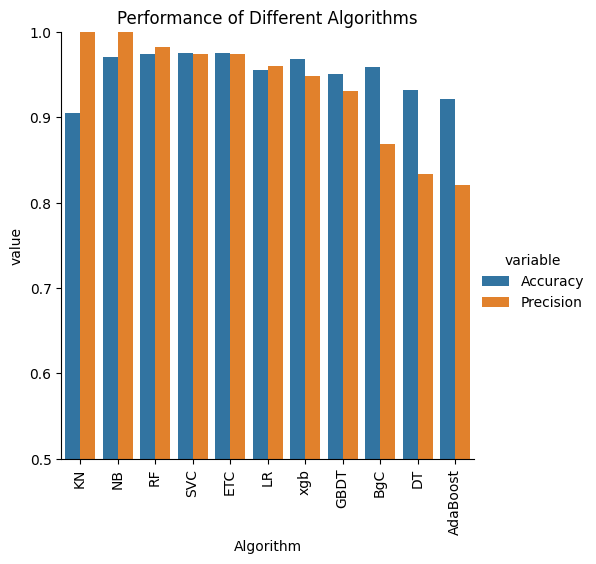

In [458]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.title('Performance of Different Algorithms')
plt.show()

### **Model imrpoving**
- **Change the max_features of TfIdf**

In [464]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [463]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,0.982609,0.973888,0.982609
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.955513,0.960000,0.955513,0.960000
6,xgb,0.968085,0.948718,0.968085,0.948718
7,GBDT,0.950677,0.930693,0.950677,0.930693
8,BgC,0.958414,0.868217,0.958414,0.868217
9,DT,0.932302,0.833333,0.932302,0.833333


In [466]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))